In [1]:
from __future__ import division, print_function
%matplotlib inline

C:\Users\cgran\Anaconda2\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import numpy as np
import matplotlib.pyplot as plt

try: plt.style.use('ggplot')
except: pass

plt.rcParams['axes.color_cycle'] = '#56B4E9, #009E73, #D55E00, #777777, #CC79A7, #E69F00, #0072B2'.split(', ')
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 1.5

In [3]:
def top_legend(*args, **kwargs):
    actual_kwargs = dict(
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=3, mode="expand", borderaxespad=0.
    )
    actual_kwargs.update(kwargs)
    return plt.legend(*args, **actual_kwargs)

In [4]:
from scipy.io import loadmat

### ``fig/innsbruck.pdf`` ###

In [5]:
innsbruck_error_probs = loadmat('Innsbruck_error_probs.mat')
wait_times = innsbruck_error_probs['msvals'][0, :]

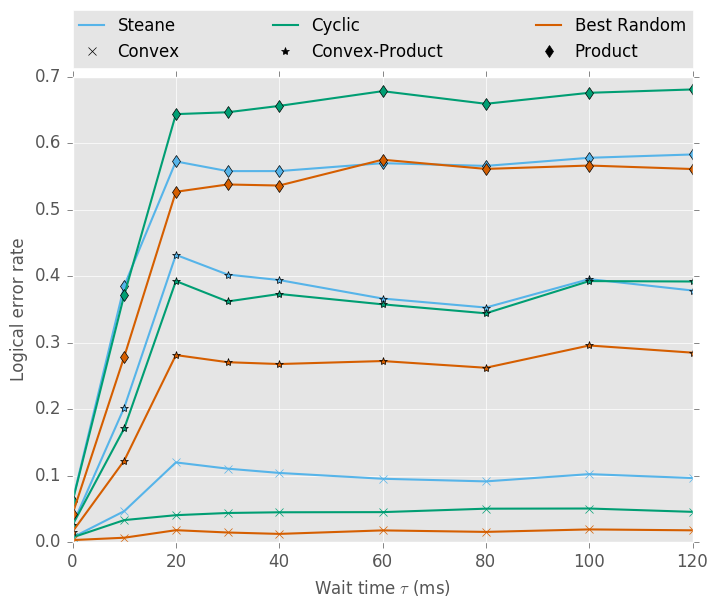

In [6]:
plt.figure(figsize=(8, 6))

for (
    best_error_pr, cyclic_error_pr, steane_error_pr,
    markerstyle
) in zip(
    innsbruck_error_probs['best_error_prob_Innsbruck'],
    innsbruck_error_probs['cyclic_error_prob_Innsbruck'],
    innsbruck_error_probs['steane_error_prob_Innsbruck'],
    'x*d'
):
    plt.gca().set_prop_cycle(None)
    plt.plot(wait_times, steane_error_pr, marker=markerstyle, label='Steane')
    plt.plot(wait_times, cyclic_error_pr, marker=markerstyle, label='Cyclic')
    plt.plot(wait_times, best_error_pr, marker=markerstyle, label='Best Random')
    
plt.xlabel(r'Wait time $\tau$ (ms)')
plt.ylabel(r'Logical error rate')

# We need some real customization to our legend here...
handles, labels = plt.gca().get_legend_handles_labels()

# Start by keeping only the first three entries, so that
# we don't repeat over extrapolation methods.
line_handles = handles[:3]
line_labels = labels[:3]

# We can now add back in the markers by taking every third
# handle and setting the line to none.
marker_handles = handles[::3]
marker_labels = ['Convex', 'Convex-Product', 'Product']

# The last thing we need to do is transpose the handles
# and labels so we can fit them as three columns.
handles = list(sum(zip(line_handles, marker_handles), ()))
labels = list(sum(zip(line_labels, marker_labels), ()))
    
legend = top_legend(
    handles,
    labels,
    ncol=3,
    numpoints=1,
    handlelength=1.5
)

# After drawing the legend, we need to strip markers from the color
# indicators and colors from the marker indicators.
for handle in legend.legendHandles[::2]:
    handle.set_marker('')
    # http://matplotlib.1069221.n5.nabble.com/legend-marker-update-problem-td41070.html
    handle._legmarker.set_marker('')
    handle.set_linewidth(1.5)
for handle in legend.legendHandles[1::2]:
    handle.set_linestyle('')
    handle._legmarker.set_color('k')
    
plt.savefig('../../fig/innsbruck.pdf', bbox_inches='tight')

### ``fig/bias.pdf`` ###

In [7]:
error_probs_bias_mat = loadmat('error_probs_bias.mat', squeeze_me=True)

Unfortunately, this file gets a bit mangled by the import from MATLAB, so we need to rearrange things a bit to make the plot itself convienent.

In [8]:
error_probs_bias = np.empty(
    error_probs_bias_mat['best_error_prob_bias'].shape,
    dtype=[('best', float), ('cyclic', float), ('steane', float)]
)
error_probs_bias['best'] = error_probs_bias_mat['best_error_prob_bias']
error_probs_bias['cyclic'] = error_probs_bias_mat['cyclic_error_prob_bias']
error_probs_bias['steane'] = error_probs_bias_mat['steane_error_prob_bias']

eta_bias = error_probs_bias_mat['eta_bias']
pr_bias = error_probs_bias_mat['p_bias']

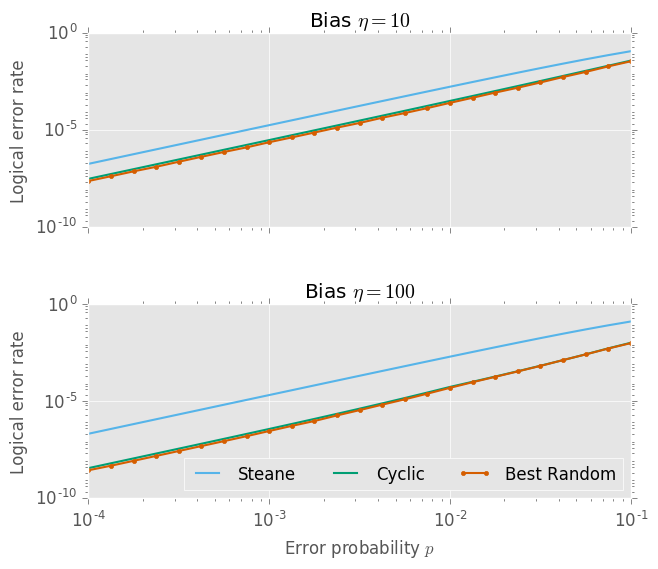

In [9]:
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(7, 6))
plt.subplots_adjust(hspace=0.4)

for (bias, bias_data, subplot) in zip(eta_bias, error_probs_bias, axes):
    plt.sca(subplot)
    plt.loglog(pr_bias, bias_data['steane'], label='Steane')
    plt.loglog(pr_bias, bias_data['cyclic'], label='Cyclic')
    plt.loglog(pr_bias, bias_data['best'], label='Best Random', marker='.')
    plt.yticks([1e-10, 1e-5,  1e0])
    plt.title(r'Bias $\eta = {}$'.format(bias))
    plt.ylabel('Logical error rate')
    
axes[-1].set_xlabel(r'Error probability $p$')
axes[-1].legend(ncol=3, loc='lower right')

plt.savefig('../../fig/bias.pdf', bbox_inches='tight')

### ``fig/p.pdf`` ###

In [10]:
error_probs_p_mat = loadmat('error_probs_p.mat', squeeze_me=True)
eta_p = error_probs_p_mat['eta_p']
p_p = error_probs_p_mat['p_p']

We need to do the same reshuffling here as well.

In [11]:
error_probs_p = np.empty(
    error_probs_p_mat['best_error_prob_p'].shape,
    dtype=[('best', float), ('cyclic', float), ('steane', float)]
)
error_probs_p['best'] = error_probs_p_mat['best_error_prob_p']
error_probs_p['cyclic'] = error_probs_p_mat['cyclic_error_prob_p']
error_probs_p['steane'] = error_probs_p_mat['steane_error_prob_p']

error_probs_p = error_probs_p.T

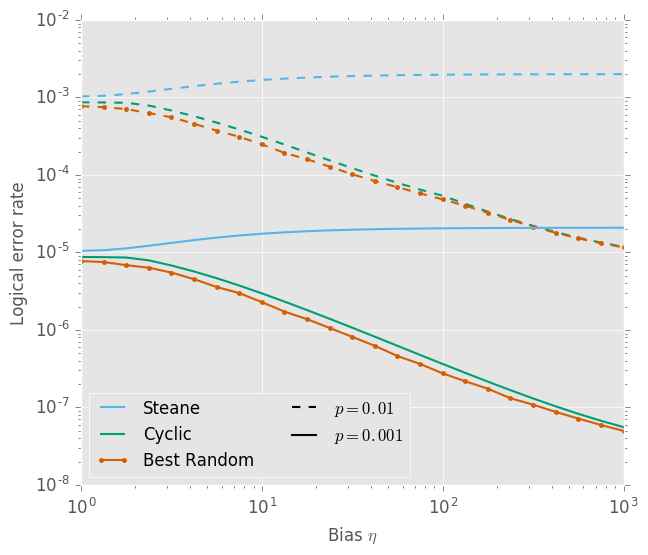

In [12]:
plt.figure(figsize=(7, 6))

for (p, p_data, linestyle) in zip(p_p, error_probs_p, ['--', '-']):
    plt.gca().set_prop_cycle(None)
    plt.loglog(eta_p, p_data['steane'], label='Steane', linestyle=linestyle)
    plt.loglog(eta_p, p_data['cyclic'], label='Cyclic', linestyle=linestyle)
    plt.loglog(eta_p, p_data['best'], label='Best Random', marker='.', linestyle=linestyle)
    plt.ylabel('Logical error rate')
    
plt.xlabel(r'Bias $\eta$')

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[3:] + [handles[1]] + [handles[4]]
labels = labels[3:] + list(map(r'$p = {}$'.format, p_p))

legend = plt.legend(handles, labels, ncol=2, loc='lower left')

# We do the same thing as before of mangling the legend
# labels after plotting to remove line colors.
for handle in legend.legendHandles[3:]:
    handle.set_color('k')

plt.savefig('../../fig/p.pdf', bbox_inches='tight')